In [1]:
import pandas as pd
import numpy as np
from utils import *
import seaborn as sns
sns.set(rc={"figure.figsize": (20, 10)})

In [2]:
GENERATE_WC = True

In [3]:
PATH1 = "../dados/brutos/tweets_marco_class/"
PATH2 = "../dados/brutos/tweets_abril_class/"

# Tweets de março

In [4]:
marco_df = get_tweets_from_folder(PATH1)
marco_df["date"] = pd.to_datetime(marco_df["date"])
tweets_marco_df = get_tweets_by_day(marco_df, True)

In [5]:
tweets_marco_df

,data,positivos,neutros,negativos,hashtags,total
0,2020-03-13,0.135952,0.360692,0.503357,"[#sobrevivencialismo, #preppers, #preparacao, ...",5958.0
1,2020-03-20,0.20157,0.401416,0.397014,"[#sextou, #bbb20, #cancelatudo, #quarentena, #...",84055.0
2,2020-03-27,0.186158,0.328647,0.485195,"[#twitter, #futurenostalgia, #quarentena, #ask...",48867.0


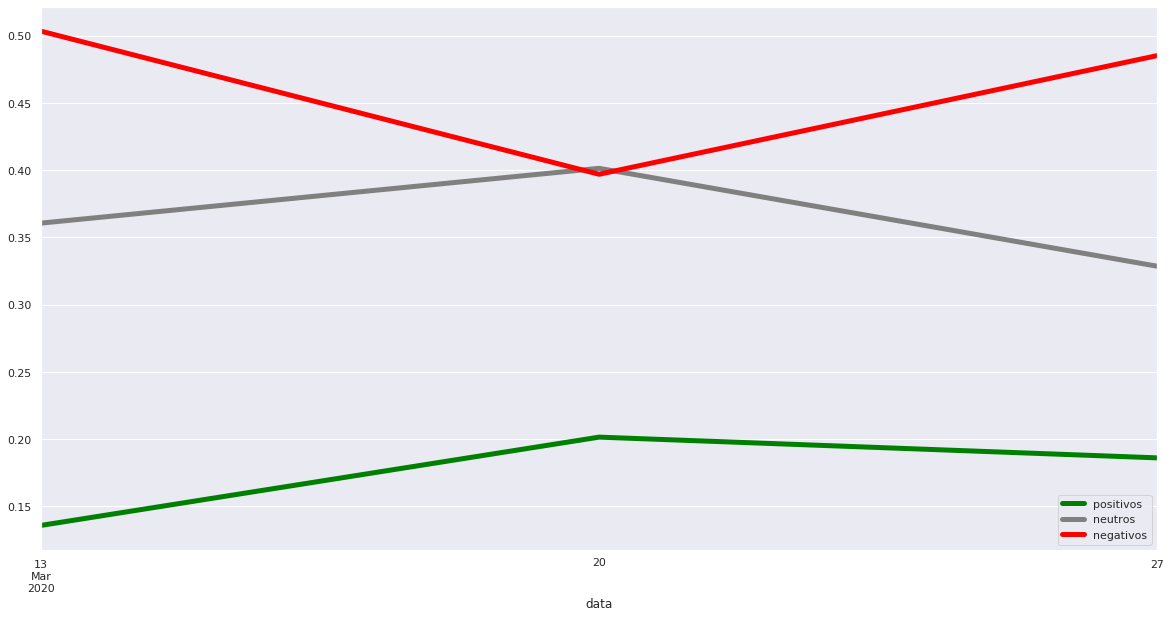

In [6]:
tweets_marco_df.set_index("data", inplace=True)
tweets_marco_df.drop("total", axis=1).plot(linewidth=5, color=["green", "gray", "red"])

# Análise de hashtags por dia de março

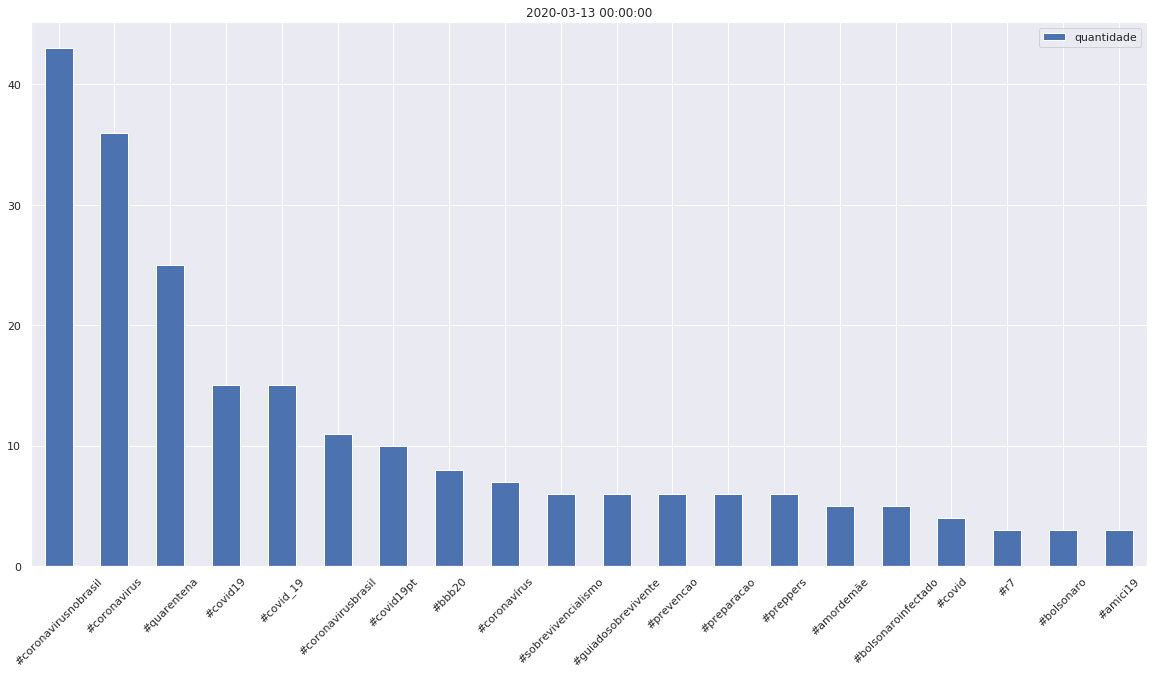

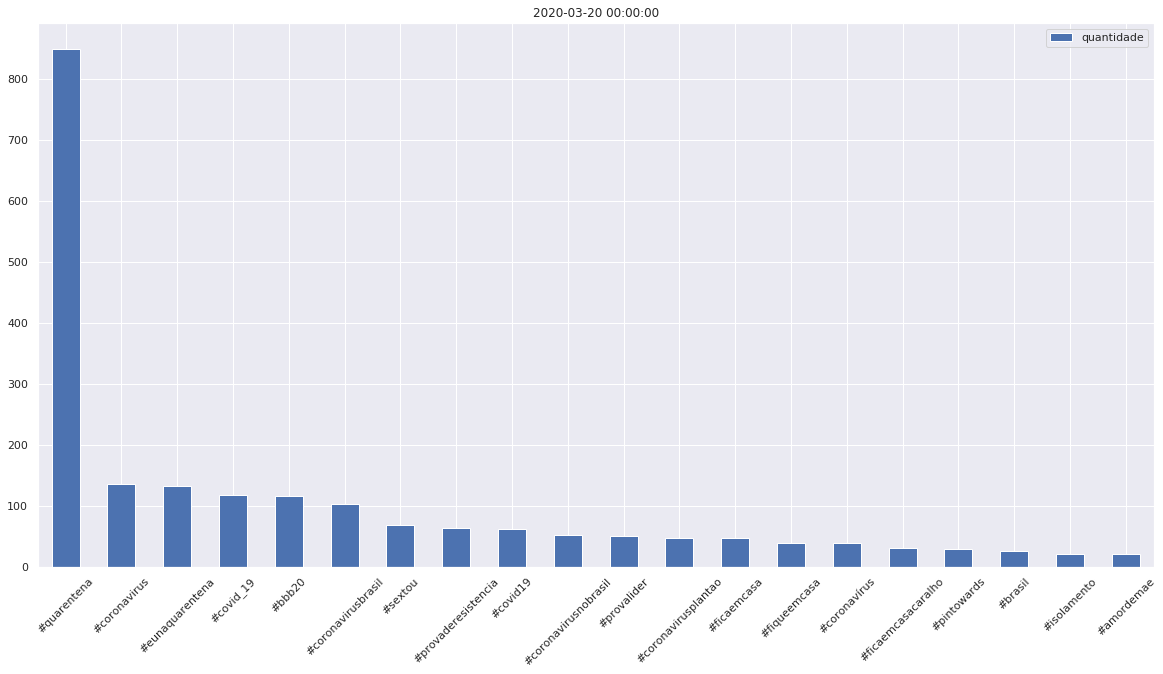

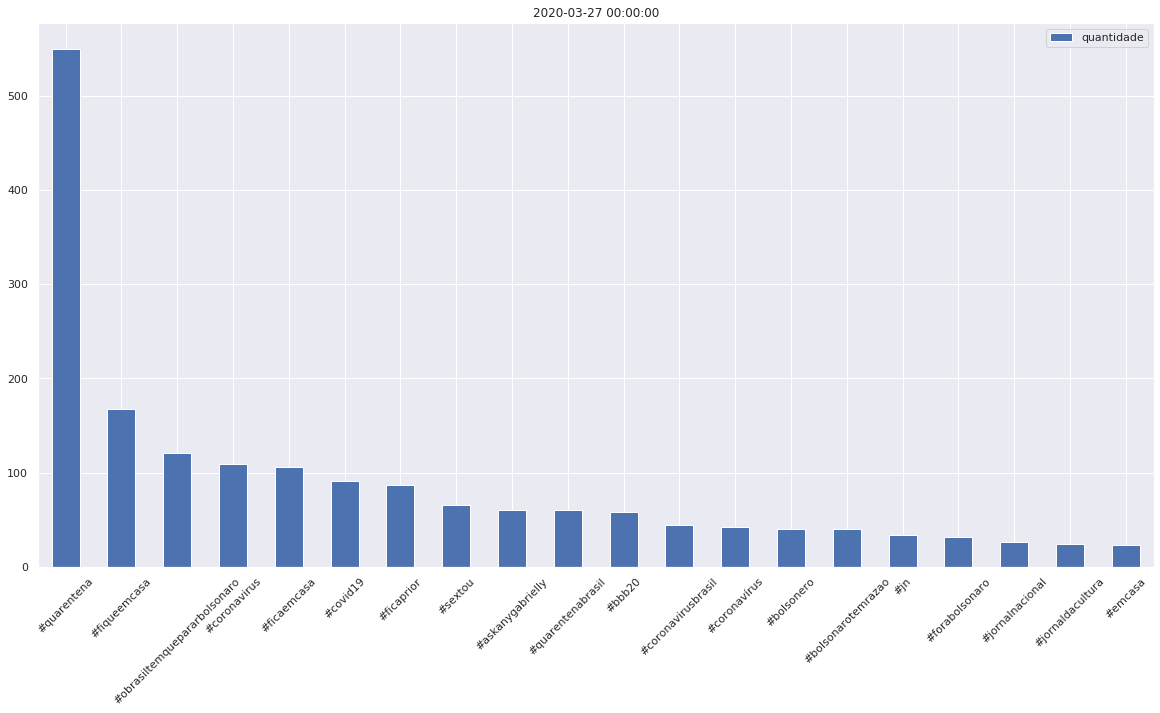

In [7]:
for day in tweets_marco_df.index:
    hashtags = tweets_marco_df.loc[day]["hashtags"]
    hashtags_df = contabilize_hashtags(hashtags)
    hashtags_df.head(20).plot.bar(rot=45, title=str(day))


# Tweets de Abril

In [8]:
abril_df = get_tweets_from_folder(PATH2)

In [9]:
abril_df["date"] = pd.to_datetime(abril_df["date"])

In [10]:
tweets_abril_df = get_tweets_by_day(abril_df, True)

In [11]:
tweets_abril_df

,data,positivos,neutros,negativos,hashtags,total
0,2020-04-17,0.206634,0.300391,0.492976,"[#thewire, #workshowlive, #foramaia, #foradori...",26622.0
1,2020-04-10,0.200878,0.301567,0.497555,"[#origami, #arteempapel, #paperart, #ficaemcas...",28017.0
2,2020-04-03,0.196989,0.31205,0.490961,"[#ravedogbremcasa, #finaestampa, #sextou, #bra...",29428.0
3,2020-04-24,0.211803,0.303525,0.484672,"[#momentos, #livedalud, #follotrick, #bbb20, #...",12200.0


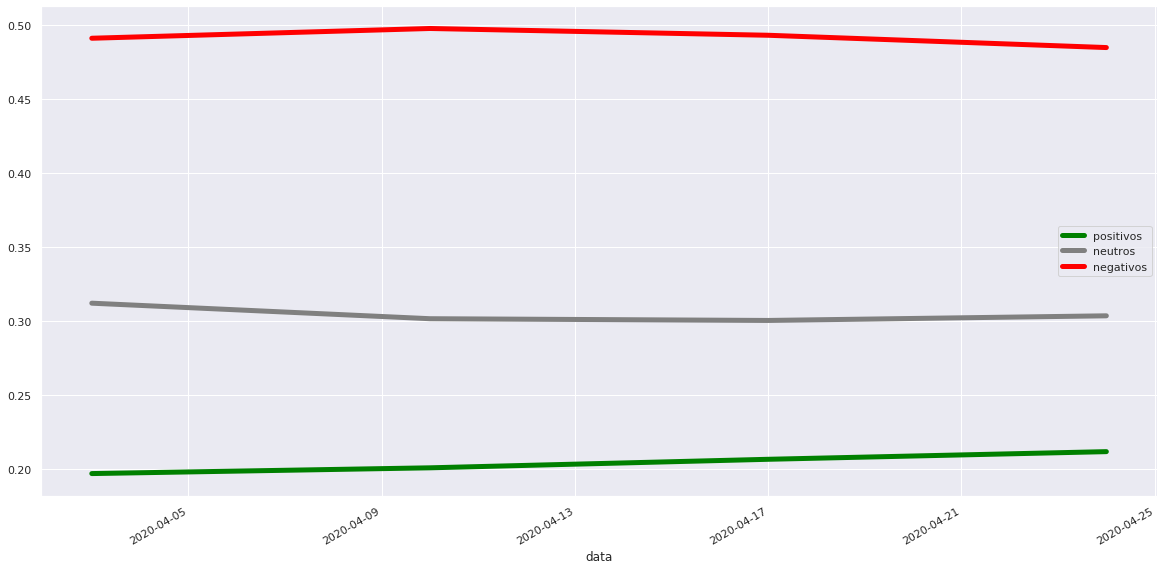

In [12]:
tweets_abril_df.set_index("data", inplace=True)
tweets_abril_df.drop("total", axis=1).plot(linewidth=5, color=["green", "gray", "red"])

# Hashtags em abril

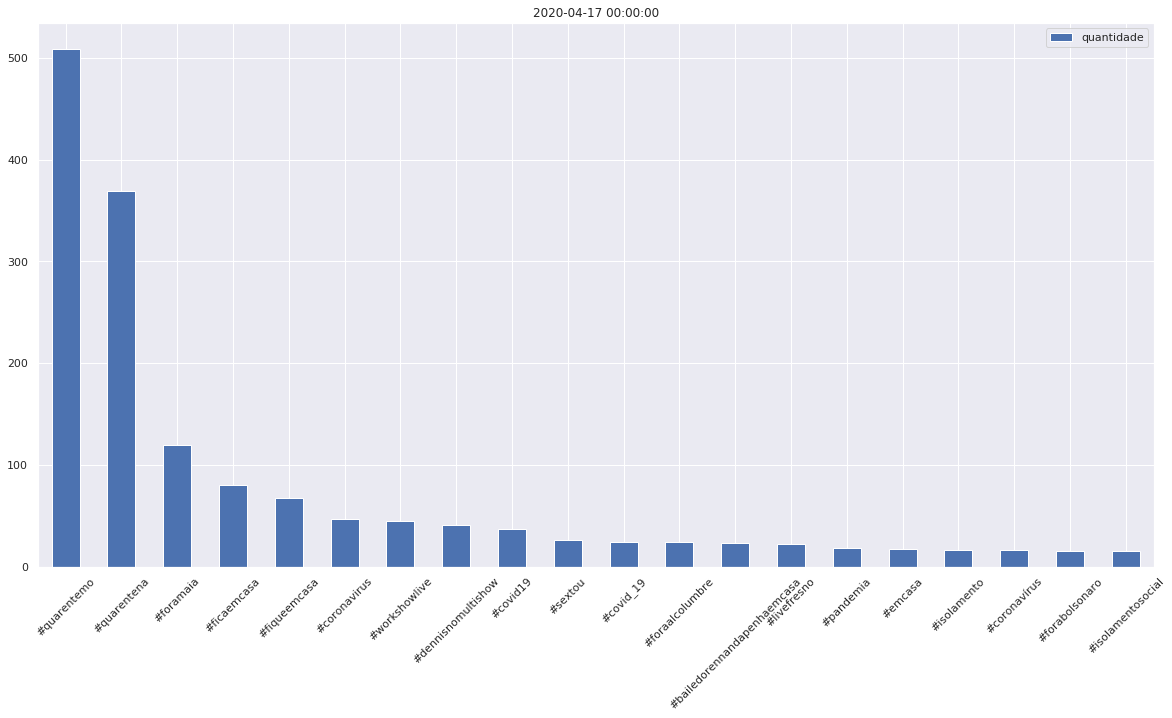

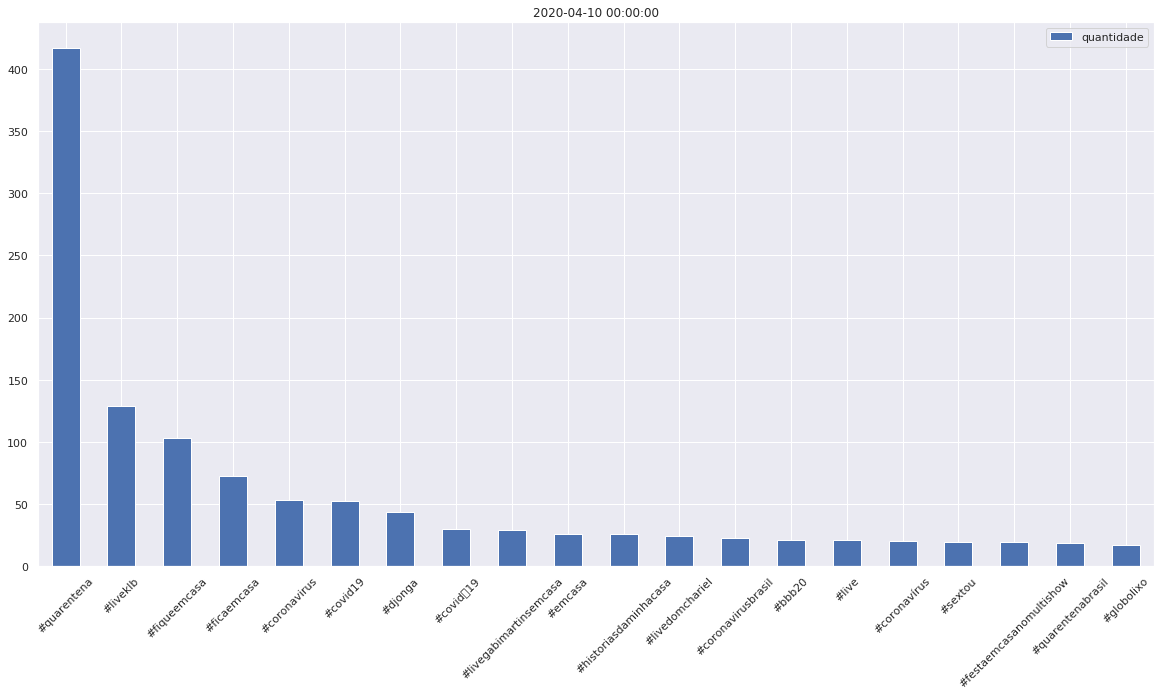

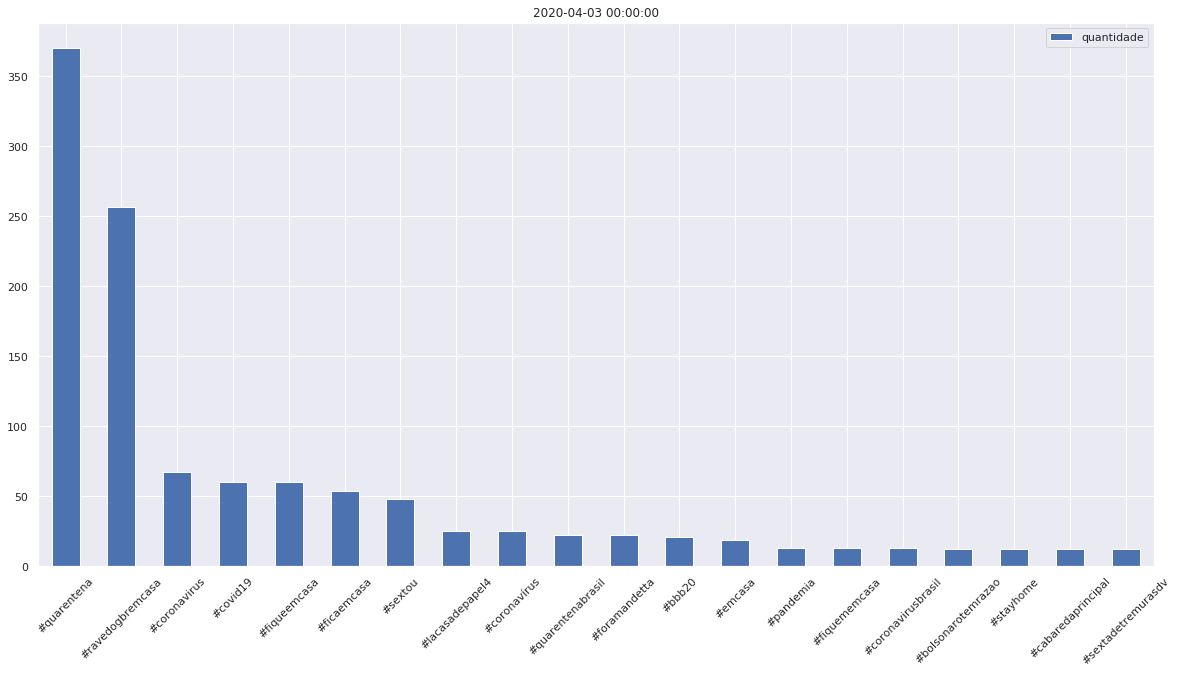

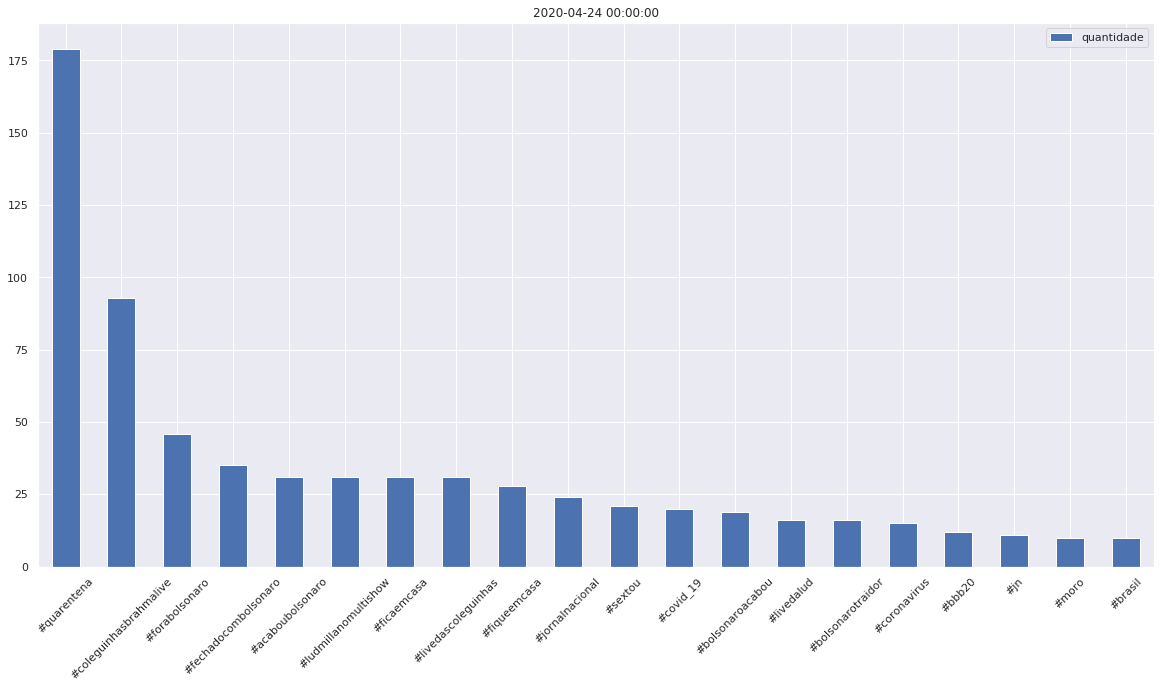

In [13]:
for day in tweets_abril_df.index:
    hashtags = tweets_abril_df.loc[day]["hashtags"]
    hashtags_df = contabilize_hashtags(hashtags)
    hashtags_df.head(20).plot.bar(rot=45, title=str(day))

# Construindo uma série temporal

In [14]:
tweets_df = tweets_marco_df.append(tweets_abril_df)

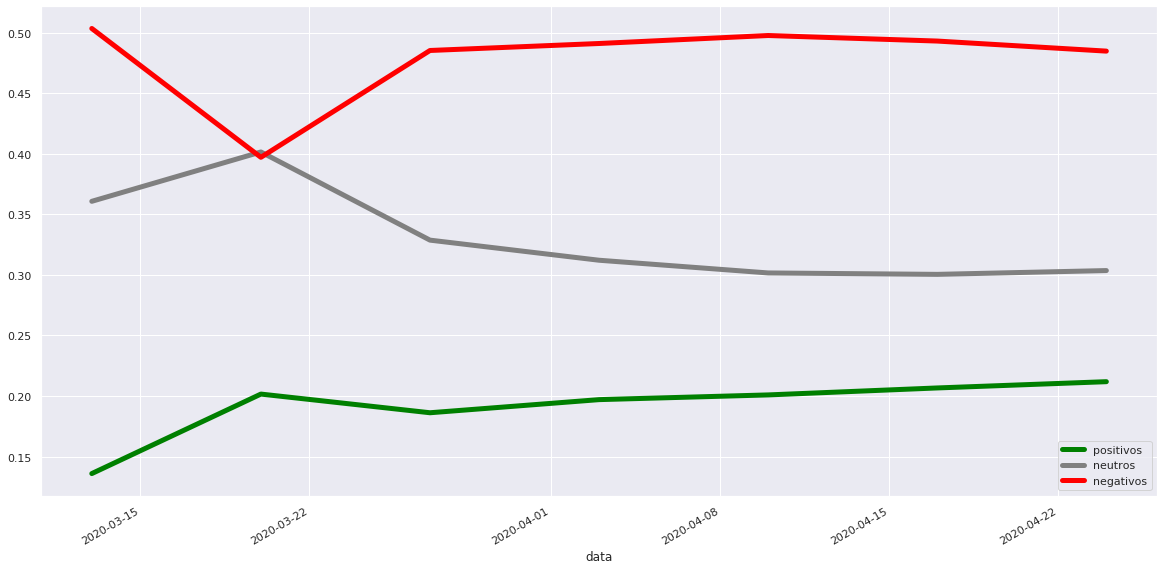

In [15]:
tweets_df.drop("total", axis=1).plot(linewidth=5, color=["green", "gray", "red"])

# Gerando Word Clouds

In [21]:
months = [(marco_df, tweets_marco_df), (abril_df, tweets_abril_df)]

In [24]:
if GENERATE_WC:
    for month_df, month_tweets in months:
        for day in month_tweets.index:
            day_df = month_df[month_df["date"] == day]
            build_wordcloud(day_df["tweet"].values.tolist(), output_file=str(day)+".png", save_file=True)

joaoca...          NaN   
90016   [{'user_id': '2331114972', 'username': '_rafac...          NaN   
90017   [{'user_id': '1144314246383185920', 'username'...          NaN   
...                                                   ...          ...   
138875  [{'user_id': '68445350', 'username': 'MetroJor...          NaN   
138876  [{'user_id': '15911679', 'username': 'Esp_Inte...          NaN   
138877  [{'user_id': '1142912683374764032', 'username'...          NaN   
138878  [{'user_id': '1173213746', 'username': 'balanc...          NaN   
138879  [{'user_id': '26278595', 'username': 'apenas1r...          NaN   

       translate  trans_src  trans_dest  sentiment negative_score  \
90013        NaN        NaN         NaN     Neutro       0.173999   
90014        NaN        NaN         NaN   Negativo       0.823470   
90015        NaN        NaN         NaN     Neutro       0.182277   
90016        NaN        NaN         NaN     Neutro       0.442335   
90017        NaN        NaN         